# Mini Project 1: Laptop Price Analysis

In [9]:
#check current working directory contents
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Einav_Tzemach_MiniProject1.ipynb',
 'laptop-price-dataset.csv']

## Data Loading and Libraries

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("laptop-price-dataset.csv") #loading the dataset
df.head(30) #showing the data 

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.30,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.80,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.50,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.70,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.10,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD,A9-Series 9420,3.00,4,500GB HDD,AMD,Radeon R5,Windows 10,2.10,400.00
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.20,16,256GB Flash Storage,Intel,Iris Pro Graphics,Mac OS X,2.04,2139.97
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.80,8,256GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,1158.70
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel,Core i7 8550U,1.80,16,512GB SSD,Nvidia,GeForce MX150,Windows 10,1.30,1495.00
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel,Core i5 8250U,1.60,8,256GB SSD,Intel,UHD Graphics 620,Windows 10,1.60,770.00


## Laptop Price Distribution

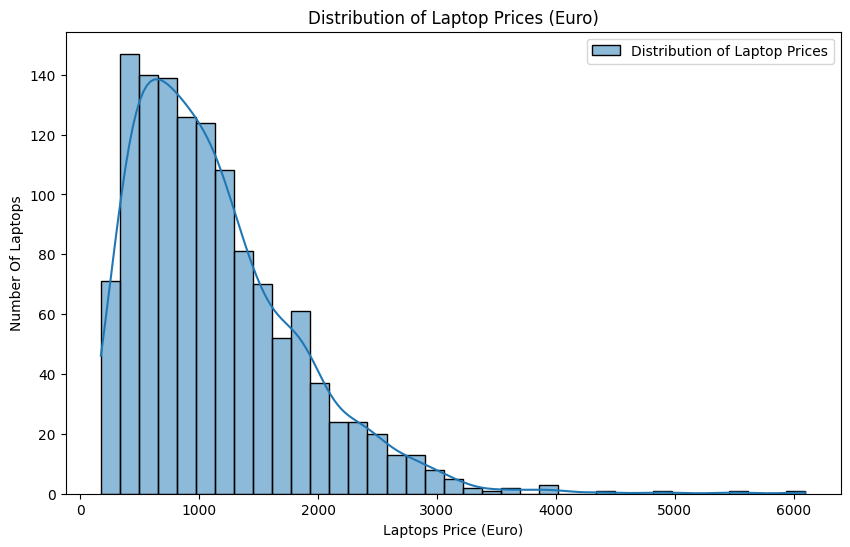

In [11]:
#Question 1
#plot the price of all the laptops
plt.figure(figsize=(10, 6))
sns.histplot(df["Price (Euro)"], kde=True, label = "Distribution of Laptop Prices")
plt.title("Distribution of Laptop Prices (Euro)") #title of the distribution
plt.xlabel("Laptops Price (Euro)") #x label
plt.ylabel("Number Of Laptops") #y label
plt.legend()
plt.show()

## Average Laptop Price by Company and Identifying the Most Expensive Company

In [12]:
#Question 2
#grouping the data by company and calculating the mean price for each 
avg_price_per_company = df.groupby("Company")["Price (Euro)"].mean()
#sorting the results in descending order to easily find the highest average price
sorted_price_per_company = avg_price_per_company.sort_values(ascending=False)
#identifying the company at the top of the sorted list by price
highes_company_price = sorted_price_per_company.index[0]
highest_avg_value = sorted_price_per_company.values[0]
print("The company with the highest price of laptops in Euro is:", highes_company_price)
print(f"The average price for {highes_company_price} is: {highest_avg_value:.3f} Euro")
print("\nThe average laptop price for each company is:")
print(avg_price_per_company)

The company with the highest price of laptops in Euro is: Razer
The average price for Razer is: 3346.143 Euro

The average laptop price for each company is:
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64


## Operating Systems: Identification and Cleaning

In [13]:
#Question 3
'''
print(df["OpSys"].value_counts()) 
Looking at the different types of operating systems to make them uniform
'''

#function to standardize and categorize operating system names
def categorize_os(os_names):
    #convert the OS name to lowercase to ensure case-insensitive matching
    lower_os_names = os_names.lower()
    #group all versions of Apple operating systems under the category "Mac"
    if "mac" in lower_os_names:
        return "Mac"
    #group all versions of Microsoft operating systems under the category "Windows"
    elif "windows" in lower_os_names:
        return "Windows"
    #if the OS is neither Mac nor Windows, keep the original name
    else:
        return os_names
    
df["OpSys"] = df["OpSys"].apply(categorize_os) 
#After unifying operating system names
print("The different types of Operating systems present in the data are:") 
print(", ".join(df["OpSys"].unique()))

#print(df["OpSys"].value_counts())
#I also added table to see the number of laptops for each operating system

The different types of Operating systems present in the data are:
Mac, No OS, Windows, Linux, Android, Chrome OS


## Price Distribution per Operating System

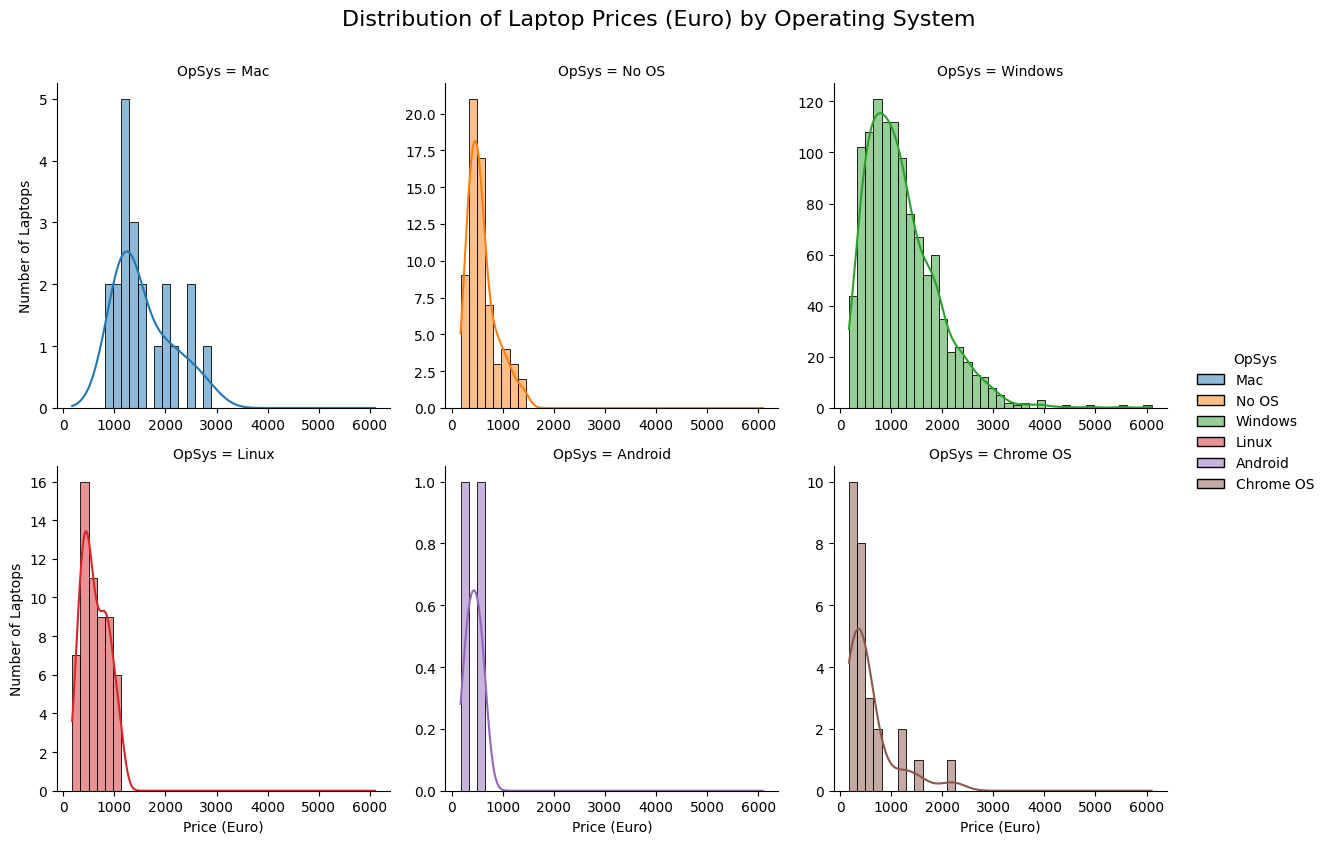

In [ ]:
#Question 4
#show for each of the operating system types the distribution of the prices
graph_of_op_price = sns.displot(
    data=df, 
    x="Price (Euro)", 
    col="OpSys", 
    hue="OpSys", s
    col_wrap=3, 
    kde=True, 
    height=4, 
    facet_kws={'sharex': False, 'sharey': False},
    legend=True
   )
graph_of_op_price.set_axis_labels("Price (Euro)", "Number of Laptops") 
graph_of_op_price.fig.suptitle("Distribution of Laptop Prices (Euro) by Operating System", y=1.05, fontsize=16)
plt.show()

## RAM and Price Correlation & Outlier Detection

The correlation between RAM and computer Price (Euro) with outliers is: 0.740


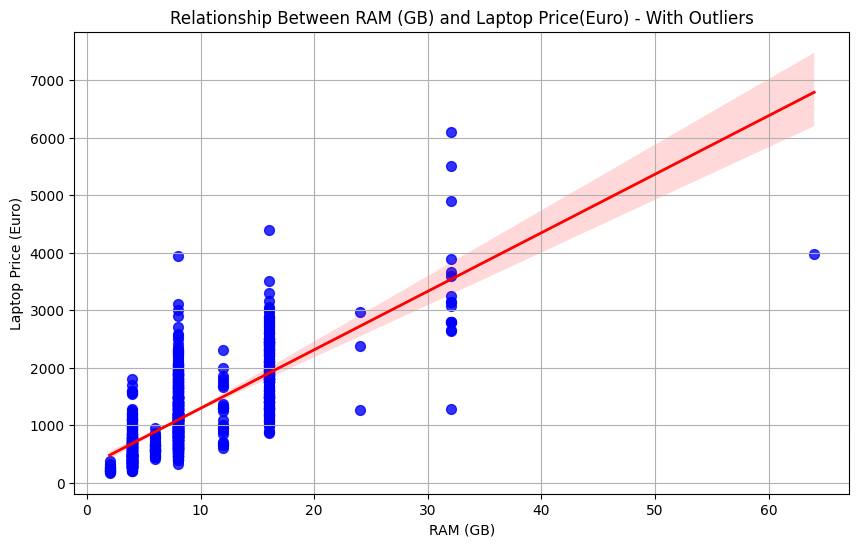

The number of outliers detected is: 28
The correlation between RAM and computer Price (Euro) without outliers is: 0.711


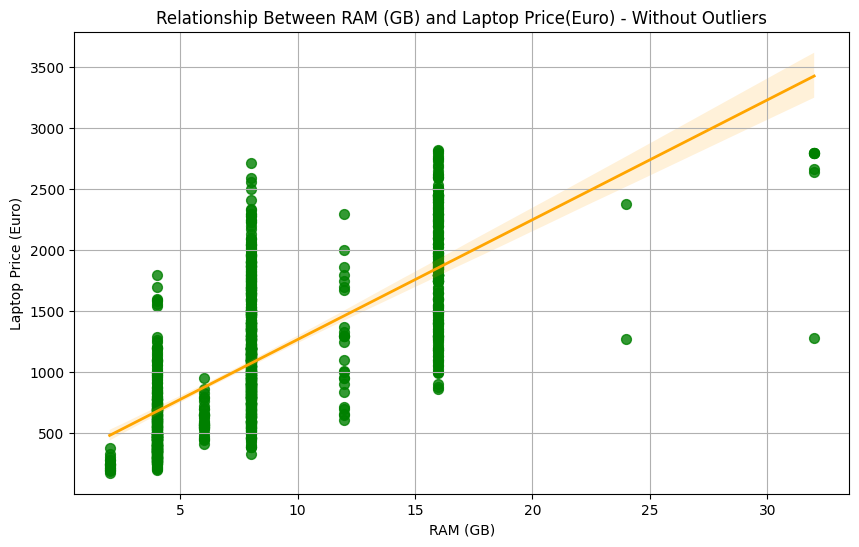

In [15]:
#Question 5
#checking the relationship between RAM and computer price by correlation method (with outliers)
#a correlation of 0.74 suggests a strong positive relationship (with outliers)
correlation_ram_price = df["RAM (GB)"].corr(df["Price (Euro)"])
print(f"The correlation between RAM and computer Price (Euro) with outliers is: {correlation_ram_price:.3f}")


#The regplot plot shows a positive relationship between RAM and laptop price (with outliers)
#laptops with higher RAM generally tend to be more expensive.
plt.figure(figsize=(10, 6))
sns.regplot(
    x="RAM (GB)", 
    y="Price (Euro)", 
    data=df, 
    scatter_kws={'color':'blue', 's':50},  
    line_kws={'color':'red', 'linewidth':2} 
)
plt.title("Relationship Between RAM (GB) and Laptop Price(Euro) - With Outliers") #the title of the plot
plt.xlabel("RAM (GB)")
plt.ylabel("Laptop Price (Euro)")
plt.grid(True)
plt.show()

'''
Identifying outliers using the Interquartile Range (IQR) method: values outside the 25th and 75th percentiles
(calculated via the 'quantile' method) are identified as outliers.
'''

#calculate lower percentiles (25th percentile) and upper percentiles (75th percentile).
lower_percentiles = df["Price (Euro)"].quantile(0.25)
upper_percentiles = df["Price (Euro)"].quantile(0.75)
#IQR calculation
IQR = upper_percentiles - lower_percentiles

#define bounds - anything above the upper bound or below the lower bound is an outlier.
lower_bound = lower_percentiles - 1.5 * IQR
upper_bound = upper_percentiles + 1.5 * IQR

#filtering the data to identify the outliers.
outliers = df[(df["Price (Euro)"] < lower_bound) | (df["Price (Euro)"] > upper_bound)]
print(f"The number of outliers detected is: {len(outliers)}")

#checking the relationship between RAM and computer price by correlation method (without outliers)
#a correlation of 0.711 suggests a strong positive relationship even though it without outliers
df_without_outliers = df[(df["Price (Euro)"] >= lower_bound) & (df["Price (Euro)"] <= upper_bound)]
correlation_ram_price_no_outliers = df_without_outliers["RAM (GB)"].corr(df_without_outliers["Price (Euro)"])
print(f"The correlation between RAM and computer Price (Euro) without outliers is: {correlation_ram_price_no_outliers:.3f}")
#The regplot plot shows a positive relationship between RAM and laptop price (without outliers)
#laptops with higher RAM generally tend to be more expensive
plt.figure(figsize=(10, 6))
sns.regplot(
    x="RAM (GB)", 
    y="Price (Euro)", 
    data=df_without_outliers, 
    scatter_kws={'color':'green', 's':50},  
    line_kws={'color':'orange', 'linewidth':2} 
)
plt.title("Relationship Between RAM (GB) and Laptop Price(Euro) - Without Outliers") #the title of the plot
plt.xlabel("RAM (GB)")
plt.ylabel("Laptop Price (Euro)")
plt.grid(True)
plt.show()

## Extracting Storage Type from Memory

In [16]:
#Question 6
#create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory"
df['Storage type'] = df['Memory'].str.replace(r'\d+\.?\d*(GB|TB|MB)\s*', '', regex=True).str.strip()
#checking the new colum to see if the command worked 
df[['Storage type']].head(30)

,Storage type
0,SSD
1,Flash Storage
2,SSD
3,SSD
4,SSD
5,HDD
6,Flash Storage
7,Flash Storage
8,SSD
9,SSD
